In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import string
import re
from textblob import TextBlob
from textblob import Word
#from wordcloud import WordCloud ,STOPWORDS



from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.wsd import lesk
from nltk.stem import PorterStemmer
from keras import layers, models, optimizers



from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble



import nltk
nltk.download('stopwords')
nltk.download('punkt')

Using TensorFlow backend.
C:\Users\ragha\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ragha\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ragha\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ragha\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

False

In [2]:
#nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [3]:
bank = pd.read_excel('D:/Analytix lab/case studies/5. Bank Reviews-Complaints Analysis/BankReviews.xlsx')

In [4]:
bank

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage
...,...,...,...,...
500,2016-02-06,1,\r\nI never write reviews but had to this time...,North American Savings Bank
501,2016-07-25,1,\r\nIt all started when Bob G ran a credit che...,North American Savings Bank
502,2017-09-27,1,\r\nWhat a horrible experience. We have excell...,North American Savings Bank
503,2017-12-24,1,"\r\nRep was extremely professional, friendly, ...",North American Savings Bank


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      505 non-null    datetime64[ns]
 1   Stars     505 non-null    int64         
 2   Reviews   505 non-null    object        
 3   BankName  505 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 15.9+ KB


In [6]:
len(bank['Reviews'])

505

Basic Exploration


In [7]:
df=bank

In [8]:
eng_stopwords = set(stopwords.words("english"))

In [9]:
df['Reviews'] = df['Reviews'].astype(str)
df['count_sent']=df["Reviews"].apply(lambda x: len(re.findall("\n",str(x)))+1)

#Word count in each comment:
df['count_word']=df["Reviews"].apply(lambda x: len(str(x).split()))

#Unique word count
df['count_unique_word']=df["Reviews"].apply(lambda x: len(set(str(x).split())))

#Letter count
df['count_letters']=df["Reviews"].apply(lambda x: len(str(x)))

#Word density

df['word_density'] = df['count_letters'] / (df['count_word']+1)

#punctuation count
df["count_punctuations"] =df["Reviews"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df["count_words_upper"] = df["Reviews"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#lower case words count
df["count_words_lower"] = df["Reviews"].apply(lambda x: len([w for w in str(x).split() if w.islower()]))

#title case words count
df["count_words_title"] = df["Reviews"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df["count_stopwords"] = df["Reviews"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

#Average length of the words
df["mean_word_len"] = df['Reviews'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

#Number of numeric
df['numeric'] = df['Reviews'].apply(lambda x :len([x for x in x.split() if x.isdigit()]))

#Number of alphanumeric
df['alphanumeric'] = df['Reviews'].apply(lambda x :len([x for x in x.split() if x.isalnum()]))

#Number of alphabetics
df['alphabetetics'] = df['Reviews'].apply(lambda x :len([x for x in x.split() if x.isalpha()]))

#Number of spaces
df['Spaces'] = df['Reviews'].apply(lambda x :len([x for x in x.split() if x.isspace()]))

#Number of Words ends with
df['words_ends_with_et'] = df['Reviews'].apply(lambda x :len([x for x in x.lower().split() if x.endswith('et')]))

#Number of Words ends with
df['words_start_with_no'] = df['Reviews'].apply(lambda x :len([x for x in x.lower().split() if x.startswith('no')]))

# Count the occurences of all words
df['wordcounts'] = df['Reviews'].apply(lambda x :dict([ [t, x.split().count(t)] for t in set(x.split()) ]))

pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

df['noun_count'] = df['Reviews'].apply(lambda x: check_pos_tag(x, 'noun'))
df['verb_count'] = df['Reviews'].apply(lambda x: check_pos_tag(x, 'verb'))
df['adj_count']  = df['Reviews'].apply(lambda x: check_pos_tag(x, 'adj'))
df['adv_count']  = df['Reviews'].apply(lambda x: check_pos_tag(x, 'adv'))
df['pron_count'] = df['Reviews'].apply(lambda x: check_pos_tag(x, 'pron'))
df['Reviews'] = df['Reviews'].astype(str)
df['count_sent']=df["Reviews"].apply(lambda x: len(re.findall("\n",str(x)))+1)
df

,Date,Stars,Reviews,BankName,count_sent,count_word,count_unique_word,count_letters,word_density,count_punctuations,...,alphabetetics,Spaces,words_ends_with_et,words_start_with_no,wordcounts,noun_count,verb_count,adj_count,adv_count,pron_count
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage,1,19,19,126,6.300000,4,...,15,0,0,0,"{'helped': 1, 'professional': 1, 'refinance': ...",0,0,0,0,0
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage,1,25,23,159,6.115385,4,...,21,0,0,0,"{'helped': 1, 'mortgage.': 1, 'the': 2, 'profe...",0,0,0,0,0
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage,1,79,64,462,5.775000,8,...,73,0,0,1,"{'they': 1, 'together': 1, 'Sincerest': 1, 'de...",0,0,0,0,0
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage,1,108,78,605,5.550459,9,...,101,0,0,1,"{'they': 1, 'have': 1, 'to': 2, 'that': 1, 'st...",0,0,0,0,0
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage,1,59,47,341,5.683333,6,...,53,0,0,1,"{'the': 4, 'recommend': 1, 'how': 1, 'professi...",0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,2016-02-06,1,\r\nI never write reviews but had to this time...,North American Savings Bank,3,455,233,2458,5.390351,38,...,420,0,0,6,"{'they': 4, 'lot': 1, 'able': 1, 'contacting':...",0,0,0,0,0
501,2016-07-25,1,\r\nIt all started when Bob G ran a credit che...,North American Savings Bank,3,164,109,828,5.018182,23,...,143,0,1,2,"{'they': 3, 'closing': 3, 'stressful...': 1, '...",0,0,0,0,0
502,2017-09-27,1,\r\nWhat a horrible experience. We have excell...,North American Savings Bank,3,135,109,752,5.529412,19,...,117,0,1,2,"{'they': 1, 'promises': 1, 'closing': 1, 'have...",0,0,0,0,0
503,2017-12-24,1,"\r\nRep was extremely professional, friendly, ...",North American Savings Bank,3,211,147,1100,5.188679,34,...,182,0,1,0,"{'Over': 1, 'following': 1, 'have': 1, 'contra...",0,0,0,0,0


In [10]:

# define X and y
X = bank.Reviews
y = bank.Stars

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404,)
(101,)
(404,)
(101,)


In [11]:
def tokenization(text):
    text=word_tokenize(text)
    return(text)

In [12]:
token_X_train = X_train.apply(lambda x: tokenization(x))
token_X_test = X_test.apply(lambda x: tokenization(x))

In [13]:
def pos_tagging(text):
    text = nltk.pos_tag(text)
    return(text)

In [14]:
pos_tag_X_train = token_X_train.apply(lambda x: pos_tagging(x))
pos_tag_X_test = token_X_test.apply(lambda x: pos_tagging(x))

In [15]:
# Disambiguation
syn=lesk(X_train, 'refinance', 'v')
print(syn)
print(syn.name())
print(syn.definition())   # meaning of refinance
print(syn.examples())

Synset('refinance.v.01')
refinance.v.01
renew the financing of
[]


In [16]:

print(syn.hypernyms())       # Opposite word of refinance
print(syn.hyponyms())

[Synset('finance.v.01')]
[]


In [17]:
syn.lemmas()                  # Synonyms of refinance

[Lemma('refinance.v.01.refinance')]

In [18]:
import string
def clean_text(text):
    text = text.lower()                                       # Convert text to lower case
    text = text.strip()
    text = re.sub(r'  ', ' ', text)                           #Replacing double space with single space
    text = text.replace('/','')                               #Replacing the / with none
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,']", "", text)      #Replacing special character with none
    text = re.sub(r'[0-9]+', '', text)                        #Replacing numbers with none
    
    return(text)

In [19]:
X_train = X_train.apply(lambda x: clean_text(x))
X_test = X_test.apply(lambda x: clean_text(x))

In [20]:
stop = set(nltk.corpus.stopwords.words('english'))
def stop_word_removal(text):
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #Removing stop words
    text = text.apply(lambda x: str(TextBlob(x).correct()))                      # Correct spelling corrections
    return(text)

In [21]:
X_train=stop_word_removal(X_train)
X_test=stop_word_removal(X_test)

In [22]:
def lemmatization(text):
    
    text = text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))    # Lemmatization
    text = text.apply(lambda x: " ".join(word for word, pos in nltk.pos_tag(x.split()) if pos not in ['NN','NNS','NNP','NNPS'])) #Removing nouns etc
    return(text)

In [23]:

X_train=lemmatization(X_train)
X_test=lemmatization(X_test)

In [24]:
#Train
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' ,
                             max_features=800)
X_train_counts = count_vect.fit_transform(X_train)

In [25]:
X_train_counts

<404x380 sparse matrix of type '<class 'numpy.int64'>'
	with 5702 stored elements in Compressed Sparse Row format>

In [26]:
X_train_dtm = X_train_counts.toarray()
X_train_dtm


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
# store token names
X_train_tokens = count_vect.get_feature_names()

In [28]:
# firstand last 50 tokens
print(X_train_tokens[:50])
print(X_train_tokens[-50:])

['aaron', 'able', 'absolutely', 'accept', 'achieve', 'across', 'actual', 'adam', 'additional', 'agreed', 'all', 'almost', 'along', 'already', 'also', 'always', 'amazing', 'american', 'another', 'answer', 'answered', 'answering', 'appraisal', 'appraise', 'appreciated', 'approved', 'around', 'ask', 'asked', 'asking', 'aspect', 'attentive', 'available', 'away', 'awesome', 'back', 'bad', 'based', 'became', 'beginning', 'beneficial', 'best', 'better', 'beyond', 'big', 'buy', 'buying', 'ca', 'call', 'called']
['that', 'thorough', 'thou', 'though', 'thought', 'thousand', 'three', 'throughout', 'timely', 'together', 'told', 'took', 'top', 'tormented', 'total', 'tree', 'tried', 'true', 'truly', 'trusted', 'trying', 'twice', 'two', 'u', 'understood', 'unless', 'unlike', 'unpleasant', 'updated', 'upon', 'use', 'used', 'using', 'various', 'via', 'want', 'wanted', 'well', 'went', 'whole', 'willing', 'within', 'without', 'wonderful', 'worked', 'working', 'would', 'wrong', 'wyndham', 'yet']


In [29]:
# count how many times EACH token appears across ALL messages in X_train_dtm
X_train_counts = np.sum(X_train_dtm, axis=0)
X_train_counts

array([  7,  38,  11,   6,   5,  13,   7,  24,  12,   6,  15,  13,  14,
        12,  37,  70,  19,   7,  25,  23,  23,   8,  11,   6,   9,   6,
        12,  14,  23,   9,   6,   5,  21,   7,   9,  36,  12,   8,   6,
        22,  16,  82,  23,  19,   7,  21,   6,   6,  23,  45,   7,   9,
        26,  21,   5,   8,  11,   9,   7,  12,  46,  54,  36,  21,  10,
         6,   7,  10,  14,  10,  16,   8,   5,  20,   6,  57,   6,  14,
         7,  16,   9,  12,  25,  11,   9,  23,   8,  12,  38,  13,  10,
         7,   7,  48,   6,  20,  16,   5,   6,   6,  14,  12,  37,  46,
        27,  53,   8,  20,   7,   9,   9,   9,  12,  10,   7,   5,  15,
        36,   8,  10,  16,  18,   7,  20,   6,   9,   7,  22,  11,  10,
         5,   6,  65,  11,  33,   7,  15,  12,   5,  13,   9,  31,   5,
         7,   6,   8,  14,  57,  22,  27,   5,  32,  39,  37,  48, 117,
        18,   5,   5,   8,   5,   5,  30,  33,   6,  29,  29,  12,   9,
        54,   8,   5,   6,  13,  15,   5,   7,   6,   7,  16,   

In [30]:
# create a DataFrame of tokens with their counts
token_count=pd.DataFrame({'token':X_train_tokens, 'count':X_train_counts})
token_count.sort_values(by=['count'],ascending=False,inplace=True)
token_count

,token,count
376,would,182
353,u,141
155,great,117
282,recommend,113
209,made,86
...,...,...
250,patiently,5
205,longer,5
232,no,5
150,given,5


In [31]:
Top20=token_count[:20]

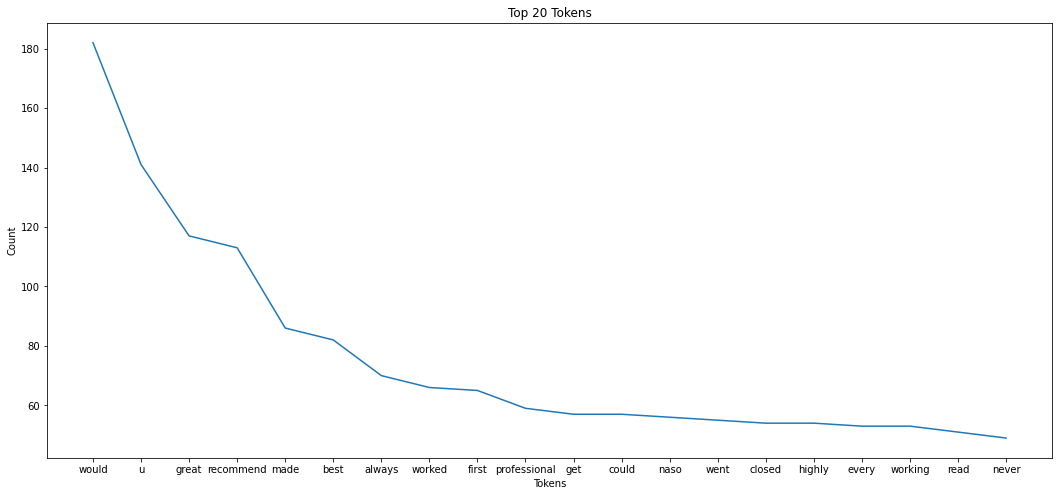

In [32]:
#Top20.plot('token','count')
plt.figure(figsize=(18,8))
plt.plot('token','count',data=Top20)
plt.xlabel('Tokens')
plt.ylabel('Count')
plt.title('Top 20 Tokens')

plt.show()

In [33]:
frequency_words_wo_stop= {}
for data in bank['Reviews']:
    tokens = nltk.wordpunct_tokenize(data.lower())
    for token in tokens:
        if token.lower() not in stop:
            if token in frequency_words_wo_stop:
                count = frequency_words_wo_stop[token]
                count = count + 1
                frequency_words_wo_stop[token] = count
            else:
                frequency_words_wo_stop[token] = 1

In [34]:
frequency_words_wo_stop

{'great': 139,
 'job': 25,
 ',': 1135,
 'wyndham': 16,
 'capital': 12,
 '!': 222,
 'person': 17,
 'professional': 70,
 'helped': 35,
 'us': 207,
 'move': 12,
 'refinance': 70,
 'process': 253,
 'smoothly': 15,
 '.': 1976,
 'thank': 50,
 'matthew': 3,
 'richardson': 1,
 'helpful': 56,
 'find': 19,
 'correct': 1,
 'product': 10,
 'mortgage': 147,
 'much': 38,
 'excellent': 30,
 'service': 99,
 'past': 13,
 'experience': 110,
 'would': 246,
 'without': 29,
 'question': 7,
 'use': 48,
 'needed': 29,
 '!!': 24,
 'went': 70,
 'beyond': 25,
 'extra': 19,
 'mile': 8,
 'right': 28,
 'wrong': 7,
 'encountered': 7,
 'servicer': 3,
 'dealing': 14,
 'previous': 13,
 'loan': 313,
 'pulled': 4,
 'together': 8,
 'found': 16,
 'viable': 3,
 'option': 8,
 'ultimately': 5,
 'saved': 7,
 'money': 22,
 'highly': 65,
 'recommend': 156,
 'brad': 7,
 'thomka': 3,
 'team': 113,
 'needs': 27,
 'sincerest': 2,
 'thanks': 61,
 'ed': 2,
 '&': 30,
 'lind': 1,
 'beginning': 32,
 'started': 17,
 'stressful': 24,
 'ti

In [35]:
# We use textblob utility to calculate polarity
def get_sentiment(text):
    # create TextBlob object of passed text 
    analysis = TextBlob(text) 
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [36]:
text = X_train
sentiment = X_train.apply(lambda x: get_sentiment(x))
Table = pd.concat([text,sentiment],axis=1)
column_names = Table.columns.values
column_names[1] = 'Sentiment'
Table.columns = column_names
Table

,Reviews,Sentiment
442,got best matched even better got,positive
42,started nick going ok fro earlier must made po...,positive
58,easy going extra overcoming truthful dependabl...,positive
481,great great easily best worked,positive
78,first steve knew understood perfectly able u a...,positive
...,...,...
255,fantastic every perfect always quick even impo...,positive
72,fast easy leave seven that friendly helped u e...,positive
396,told financed unbelievable wanted find little ...,positive
235,worked on quick free appreciated on u whole ex...,positive


In [37]:
# picking positive reviews
positive = Table[Table.Sentiment == 'positive']
# percentage of positive reviews 
print("Positive tweets percentage: {} %".format(100*len(positive)/len(Table.Reviews))) 


# picking negative reviews
negative = Table[Table.Sentiment == 'negative']
# percentage of negative reviews 
print("Negative tweets percentage: {} %".format(100*len(negative)/len(Table.Reviews))) 

# percentage of neutral reviews
print("Neutral tweets percentage: {} %".format(100*(len(Table.Reviews)-len(negative)-len(positive))/len(Table.Reviews)))

Positive tweets percentage: 87.12871287128714 %
Negative tweets percentage: 8.910891089108912 %
Neutral tweets percentage: 3.9603960396039604 %


In [38]:
print(positive.head(5)['Reviews'].tolist())
negative.head(5)['Reviews'].tolist()

['got best matched even better got', 'started nick going ok fro earlier must made possible would understood never heard called nick several even called remained want due', 'easy going extra overcoming truthful dependable professional', 'great great easily best worked', 'first steve knew understood perfectly able u achieve given realistic beginning steve kept touch u throughout gave u accurate u along']


['worst lending provided incorrect led spend appraisal quite twice much putting close new oh yes one made yet yet explain wont say hello',
 'responsive worked hard u approved on really made u like',
 'miserable screwed imaginable never accepted recommend hothouse much purchasing new',
 'first capitol kenneth you frustrated him arrogantevery talked would always stylet call back hear happened probably want extremely badge raise took probably monthbut took little get said lost also motorcycle supposed get ill call back his called back next read',
 'taking soon found stopped would return call finally got hold short little asked detail went different']

In [39]:
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

In [40]:
tf_idf_vectorizor = TfidfVectorizer(max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(X_train)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [41]:
tf_idf_vectorizor = TfidfVectorizer(max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(X_train)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [42]:
    
    def __init__(self, k, seed = None, max_iter = 200):
        self.k = k
        self.seed = seed
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter
    
    def initialise_centroids(self, data):
        
        initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        self.centroids = data[initial_centroids]
        return self.centroids
    
    def assign_clusters(self, data):
       
        if data.ndim == 1:
            data = data.reshape(-1, 1)
        
        dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)
        return  self.cluster_labels
    
    def update_centroids(self, data):
       
        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])
        return self.centroids
    
    def predict(self, data):
        return self.assign_clusters(data)
    
    def fit_kmeans(self, data):
      
        self.centroids = self.initialise_centroids(data)
        
        # Main kmeans loop
        for iter in range(self.max_iter):

            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)          
            if iter % 100 == 0:
                print("Running Model Iteration %d " %iter)
        print("Model finished running")
        return self

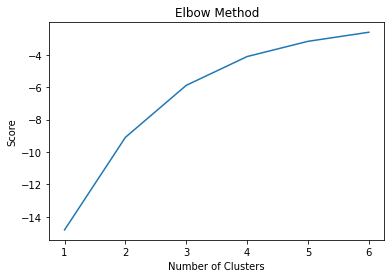

In [43]:
number_clusters = range(1, 7)
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

#test_e = kmeans([3, 1, 600])
#fitted = test_e.fit_kmeans(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

centers = fitted.centroids
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6)

In [44]:

sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

In [45]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs
df1,df2,df3 = get_top_features_cluster(tf_idf_array, prediction, 15)
df1

,features,score
0,recommend,0.092888
1,best,0.085923
2,highly,0.068868
3,knowledgeable,0.067092
4,worked,0.066455
5,on,0.059014
6,would,0.056765
7,naso,0.053962
8,made,0.050022
9,looking,0.047626


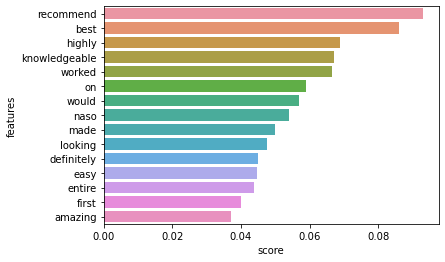

In [46]:
# cluster1 top 15 words
sns.barplot(x='score',y="features", data=df1)
plt.show()

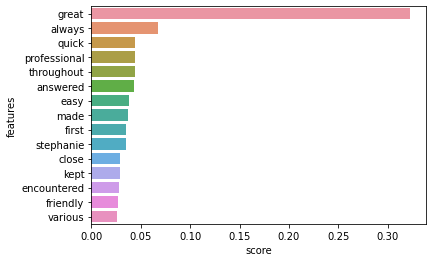

In [47]:
# cluster2 top 15 words 
sns.barplot(x='score',y="features", data=df2)
plt.show()

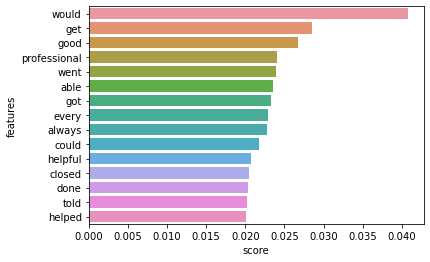

In [48]:

# cluster3 top 15 words
sns.barplot(x='score',y="features", data=df3)
plt.show()

In [49]:
#Train
count_vect = CountVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' , 
                             max_features=800)
xtrain_count = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(xtrain_count)

#Test
#count_vect = CountVectorizer()
xtest_count = count_vect.transform(X_test)

#tfidf_transformer = TfidfTransformer()
X_test_tfidf = tfidf_transformer.transform(xtest_count)

In [50]:
dtm2=pd.DataFrame(X_train_tfidf.toarray(), columns=count_vect.get_feature_names())
dtm2.head(10)

,aaron,able,absolutely,accept,achieve,across,actual,adam,additional,agreed,...,willing,within,without,wonderful,worked,working,would,wrong,wyndham,yet
0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
1,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.131871,0.0,0.0,0.000000
2,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
3,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.355260,0.0,0.000000,0.0,0.0,0.000000
4,0.000000,0.172342,0.0,0.0,0.260478,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
5,0.194955,0.000000,0.0,0.0,0.000000,0.175734,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.112632,0.0,0.000000,0.0,0.0,0.000000
6,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.172073,0.0,0.000000,0.0,0.0,0.000000
7,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.157256,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
8,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.570871
9,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000


In [51]:

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern='\w{1,}', ngram_range=(1, 2), max_features=800)
tfidf_vect_ngram.fit(bank['Reviews'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(X_train)
xtest_tfidf_ngram =  tfidf_vect_ngram.transform(X_test)

In [52]:
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern='\w{1,}', ngram_range=(1,2), max_features=800)
tfidf_vect_ngram_chars.fit(bank['Reviews'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_train) 
xtest_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_test)

C:\Users\ragha\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:501: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [53]:
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=50)
X_topics = lda_model.fit_transform(X_train_tfidf)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

In [54]:

# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

topic_summaries

['timely outstanding always appreciated friendly became offer forward fred initially',
 'u great best would every made always got quick recommend',
 'came left in kept entire even dealing two specifically pacific',
 'informed naso together expected throughout kept well multiple smooth tree',
 'efficient friendly helpful chose pleased quickly naso dean conventional clear',
 'tormented professional go provided great efficient all along can financial',
 'real suggested responsive every know highly first fine recommend great',
 'closed great would poor lender on extremely recommend impressed looking',
 'mr naso even big t couldn helping closing beginning buy',
 'fine overall required received good helping confident seemed future chose',
 'adam left ensure since made unlike thou smooth confident beginning',
 'aspect beyond financial felt worked took necessary taken ensure clear',
 'thorough next promptly rich super able responsive answered need i',
 'steve bad u given achieve understood alo

In [55]:

def train_model(classifier, feature_vector_train, label, feature_vector_valid,  valid_y, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

In [56]:
#Naive Bayes
# Naive Bayes on Count Vectors and TF-IDF
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("NB for L1, Count Vectors: ", accuracy_L1)



# Naive Bayes on Word Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_count, y_train, xtest_count, y_test)
print("NB for L1, WordLevel TF-IDF: ", accuracy_L1)



# Naive Bayes on Ngram Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram, y_test)
print("NB for L1, N-Gram Vectors: ", accuracy_L1)



# Naive Bayes on Character Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars, y_test)
print("NB for L1, CharLevel Vectors: ", accuracy_L1)

NB for L1, Count Vectors:  0.8910891089108911
NB for L1, WordLevel TF-IDF:  0.9306930693069307
NB for L1, N-Gram Vectors:  0.8217821782178217
NB for L1, CharLevel Vectors:  0.8118811881188119


In [57]:
texts = [review for review in X_train]
stars = [review for review in y_train]

In [58]:

# Balancing the Data
from collections import Counter
 
def balance_classes(xs, ys):
    """Undersample xs, ys to balance classes."""
    freqs = Counter(ys)
 
    # the least common class is the maximum number we want for all classes
    max_allowable = freqs.most_common()[-1][1]
    num_added = {clss: 0 for clss in freqs.keys()}
    new_ys = []
    new_xs = []
    for i, y in enumerate(ys):
        if (num_added[y] < max_allowable):
            new_ys.append(y)
            new_xs.append(xs[i])
            num_added[y] += 1
    return(new_xs, new_ys)

In [59]:
print(Counter(stars))
balanced_x, balanced_y = balance_classes(texts, stars)
print(Counter(balanced_y))

Counter({5: 328, 1: 76})
Counter({5: 76, 1: 76})


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
# This vectorizer breaks text into single words and bi-grams
# and then calculates the TF-IDF representation
vectorizer = TfidfVectorizer(ngram_range=(1,2))
vectors = vectorizer.fit_transform(balanced_x)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(vectors, balanced_y, test_size=0.33, random_state=42)


In [62]:
from sklearn.svm import LinearSVC
 
# initialise the SVM classifier
classifier = LinearSVC()
 
# train the classifier
classifier.fit(X_train, y_train)

LinearSVC()

In [63]:
# prediction of train data
train_preds = classifier.predict(X_train)
print(list(train_preds[:10]))
print(y_train[:10])
[5, 1, 5, 1, 1, 1, 5, 5, 1, 5]
[5, 1, 5, 1, 1, 1, 5, 5, 1, 5]


# prediction of train data
test_preds = classifier.predict(X_test)
print(list(test_preds[:10]))
print(y_test[:10])

[5, 1, 5, 1, 1, 1, 5, 5, 1, 5]
[5, 1, 5, 1, 1, 1, 5, 5, 1, 5]
[5, 1, 1, 5, 1, 1, 1, 1, 5, 5]
[5, 1, 1, 5, 1, 1, 1, 5, 5, 5]


In [64]:

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, test_preds))

0.9411764705882353
